In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-default-dataset/Loan_Default.csv


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("/kaggle/input/loan-default-dataset/Loan_Default.csv")

In [7]:
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [5]:

print(df.shape)
print(df.info())
print(df['Status'].value_counts(normalize=True))  # Class balance check


(148670, 34)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges 

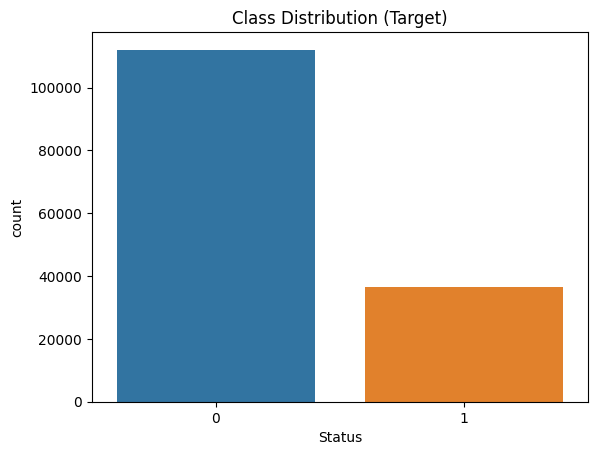

In [6]:
sns.countplot(x='Status', data=df)
plt.title("Class Distribution (Target)")
plt.show()

<Axes: >

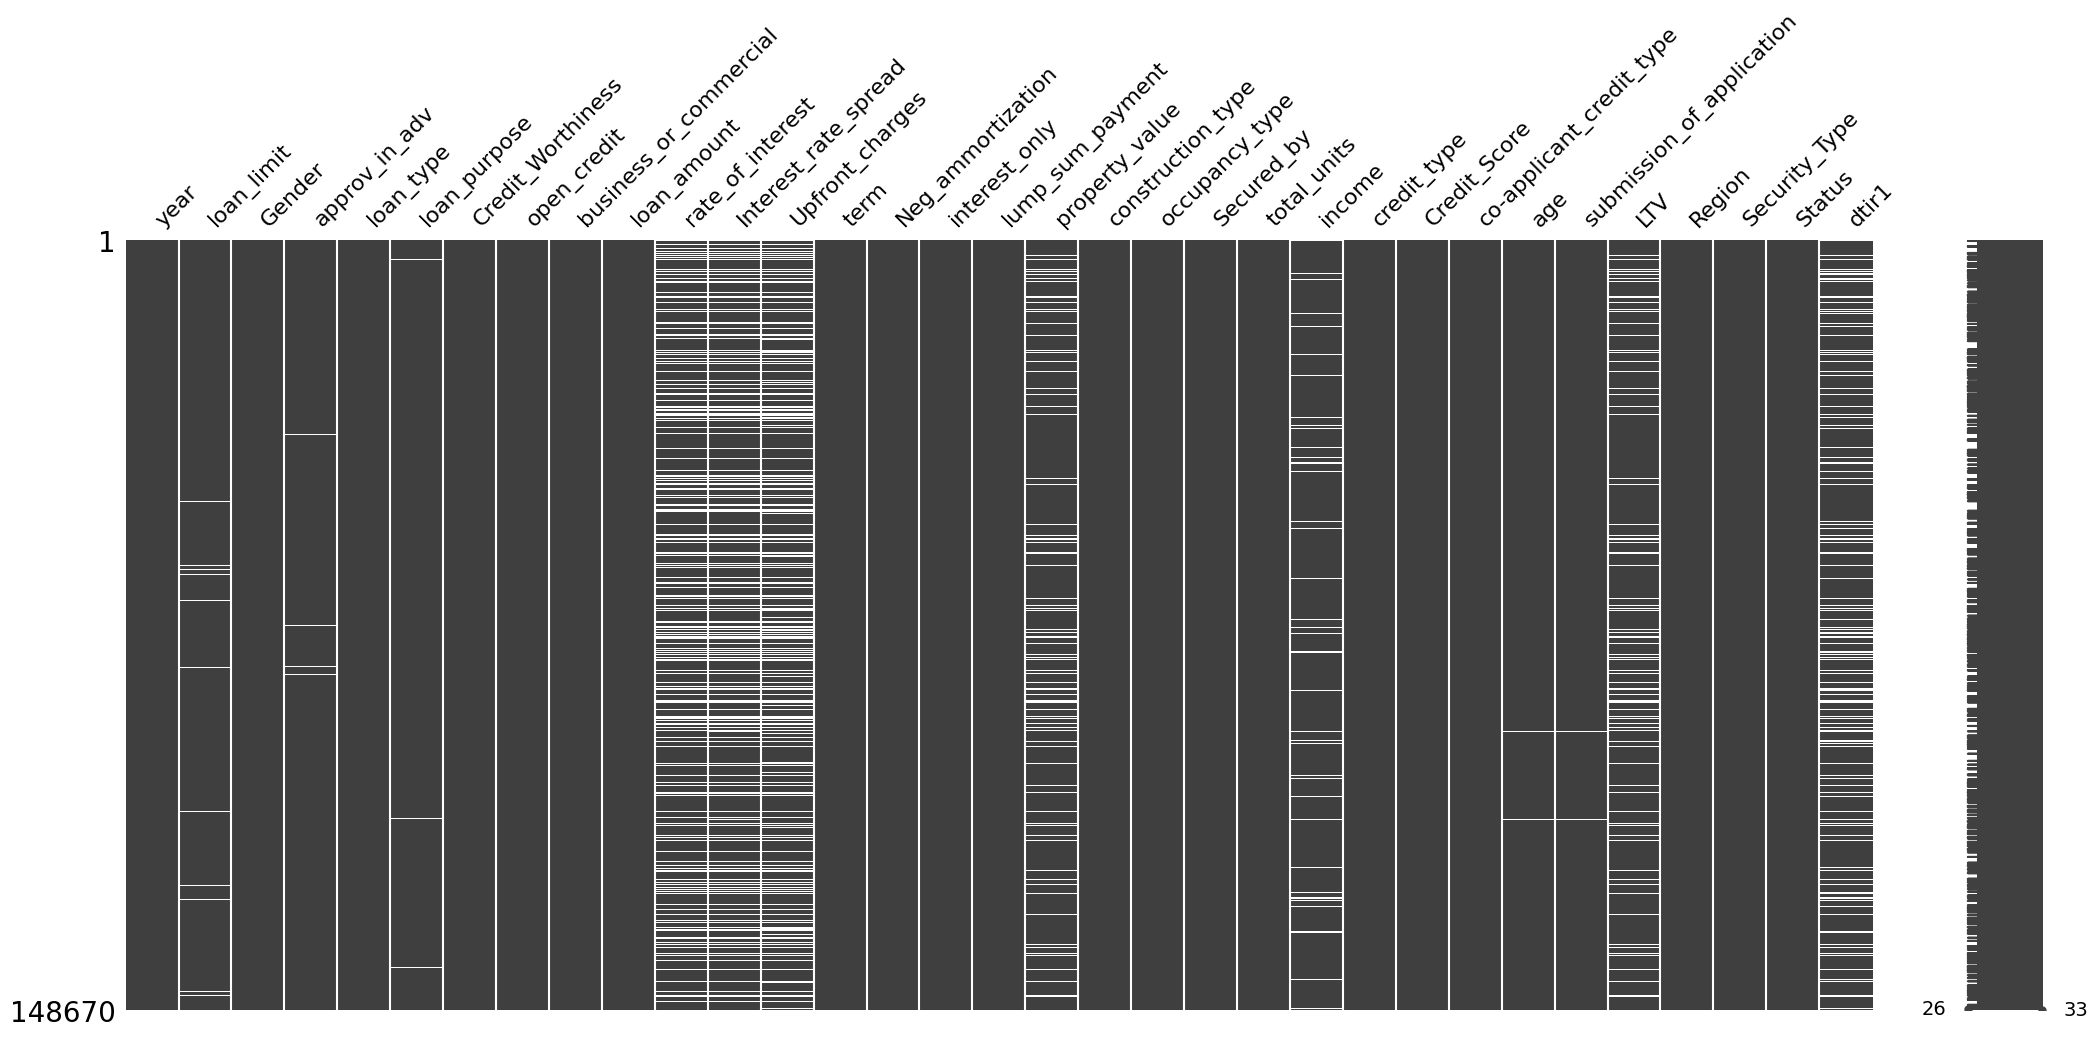

In [14]:
import missingno as msno

# Matrix plot 
msno.matrix(df)


In [15]:
# duplicate rows & duplicate IDs
dup_rows = int(df.duplicated().sum())
dup_ids = {}
ID_COLS = ["ID"] 
for c in ID_COLS:
    if c in df.columns:
        dup_ids[c] = int(df[c].duplicated().sum())

print("\n=== DUPLICATE ROWS ===", dup_rows)
print("\n=== DUPLICATE IDs ===", dup_ids)


=== DUPLICATE ROWS === 0

=== DUPLICATE IDs === {}


In [13]:
# constant columns (zero variance)
constant_cols = card[card <= 1].index.tolist()


        
# missingness per column
na = (
    df.isna().sum()
      .to_frame("n_missing")
      .assign(pct=lambda x: (100 * x["n_missing"] / len(df)).round(2)) # gives percentage of missing values
      .sort_values("pct", ascending=False)
)
# show top 10 worst columns
na.head(10)

,n_missing,pct
Upfront_charges,39642,26.66
Interest_rate_spread,36639,24.64
rate_of_interest,36439,24.51
dtir1,24121,16.22
LTV,15098,10.16
property_value,15098,10.16
income,9150,6.15
loan_limit,3344,2.25
approv_in_adv,908,0.61
submission_of_application,200,0.13


In [20]:
df[['rate_of_interest', 'Interest_rate_spread']].dropna().corr()

,rate_of_interest,Interest_rate_spread
rate_of_interest,1.000000,0.614908
Interest_rate_spread,0.614908,1.000000


0.614908 - moderate to strong correlation


In [19]:
# cardinality (unique counts) per column
card = df.nunique(dropna=False).sort_values(ascending=False)
print(card)

Upfront_charges              58272
Interest_rate_spread         22517
LTV                           8485
income                        1002
Credit_Score                   401
property_value                 386
loan_amount                    211
rate_of_interest               132
dtir1                           58
term                            27
age                              8
loan_purpose                     5
Region                           4
total_units                      4
Gender                           4
credit_type                      4
loan_type                        3
Neg_ammortization                3
loan_limit                       3
submission_of_application        3
occupancy_type                   3
approv_in_adv                    3
co-applicant_credit_type         2
Status                           2
Security_Type                    2
lump_sum_payment                 2
Secured_by                       2
construction_type                2
interest_only       

In [16]:
# constant columns (zero variance)
constant_cols = card[card <= 1].index.tolist()
print("\n=== CONSTANT COLUMNS ===", constant_cols)


=== CONSTANT COLUMNS === ['year']


In [6]:
# ID is basically like an identifier - so let's just set it as an index
df = df.set_index("ID")

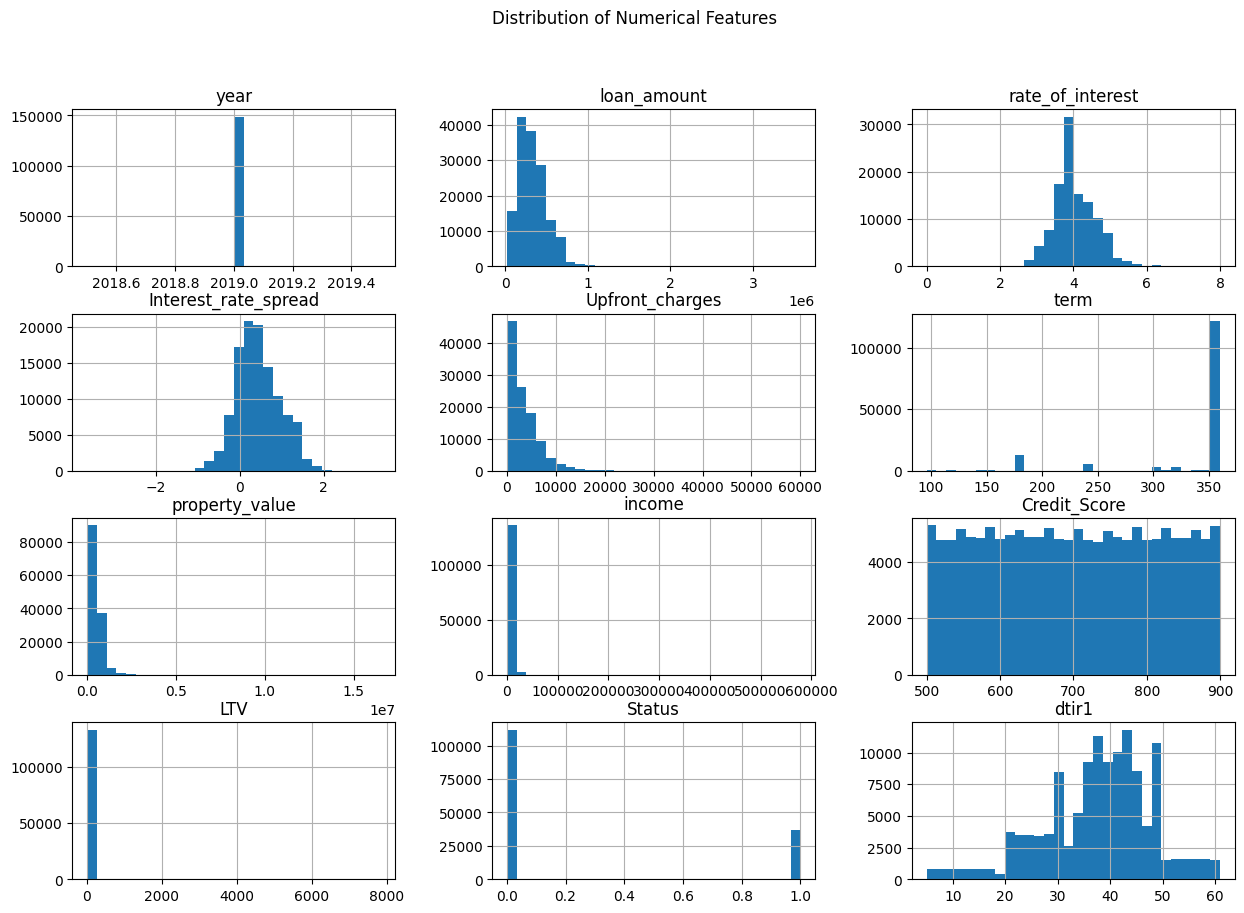

In [13]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[num_cols].hist(bins=30, figsize=(15, 10))
plt.suptitle("Distribution of Numerical Features")
plt.show()

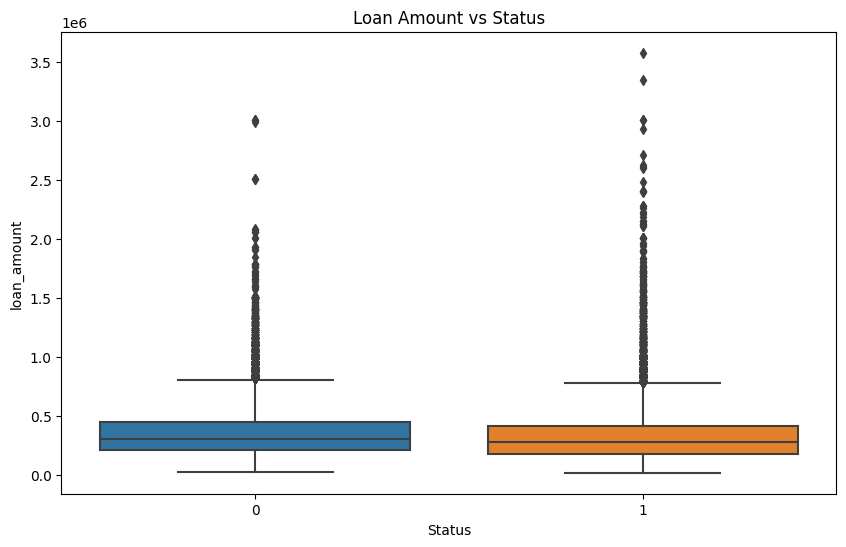

In [14]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Status', y='loan_amount', data=df)
plt.title("Loan Amount vs Status")
plt.show()


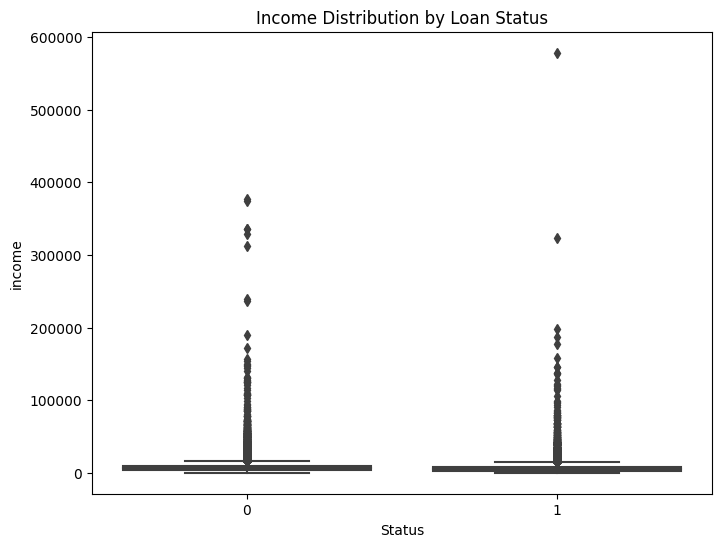

In [20]:
# Let's say "income" vs "Status"
plt.figure(figsize=(8, 6))
sns.boxplot(x='Status', y='income', data=df)
plt.title("Income Distribution by Loan Status")
plt.show()

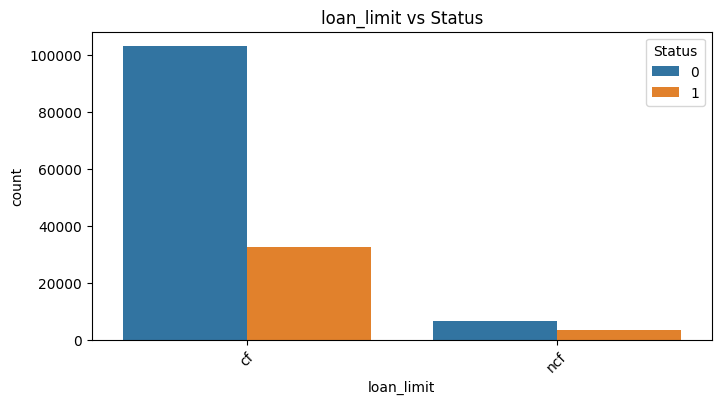

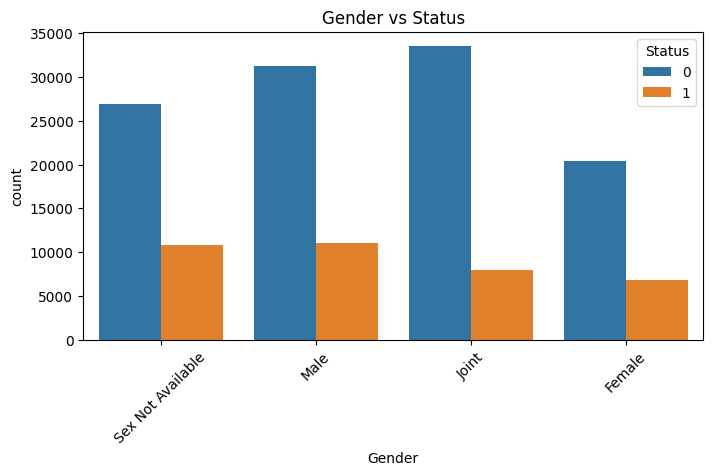

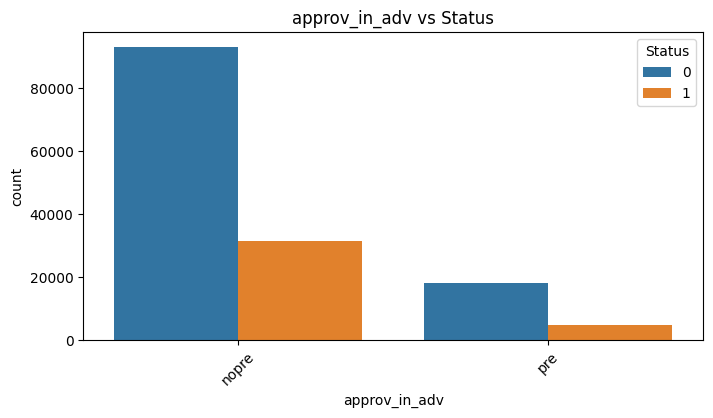

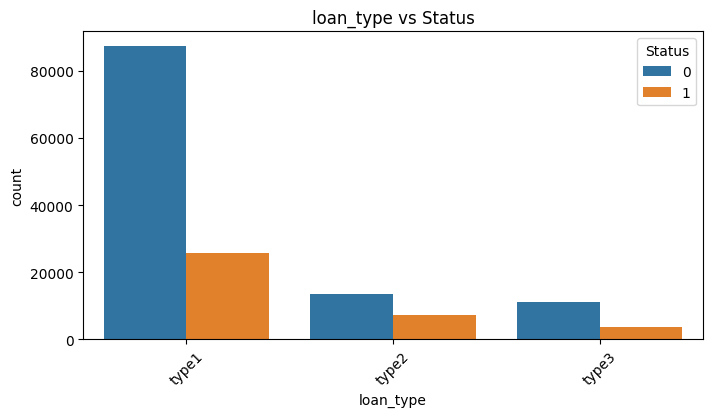

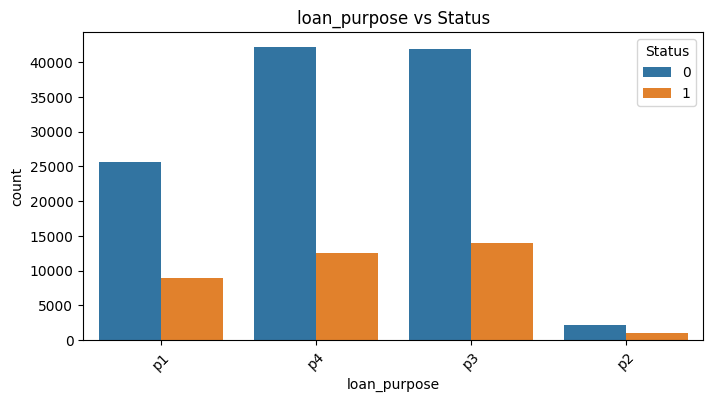

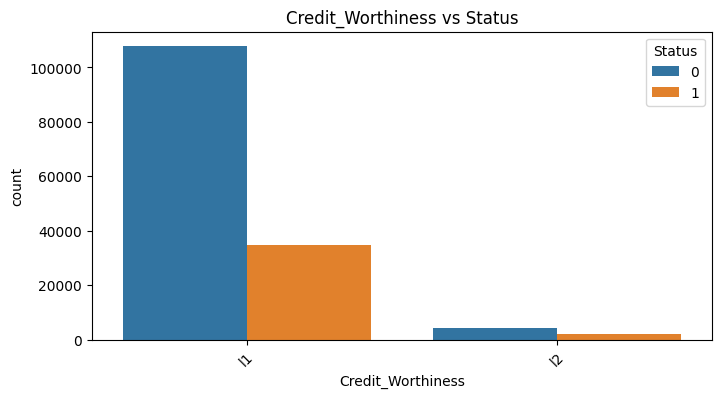

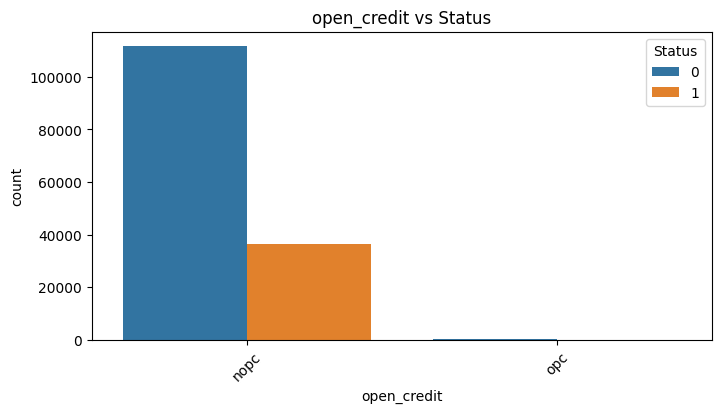

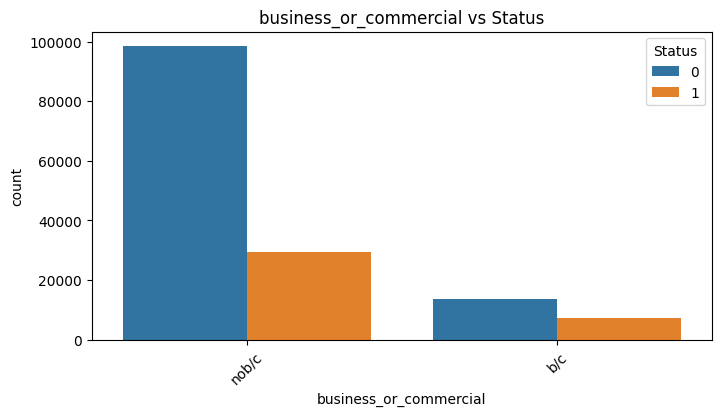

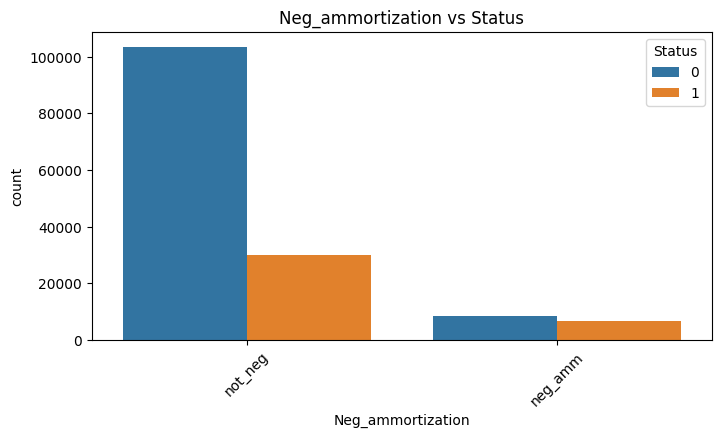

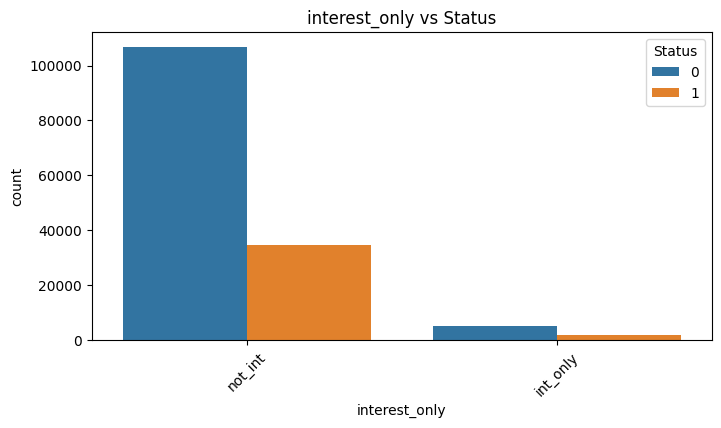

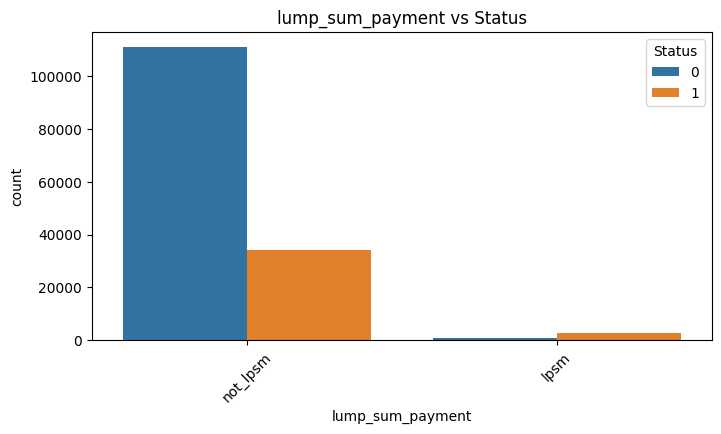

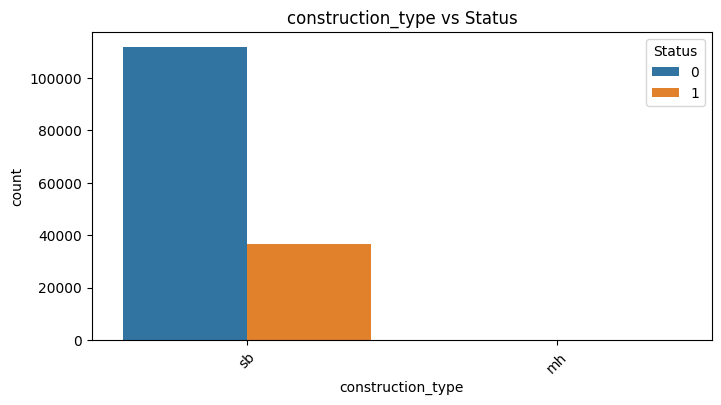

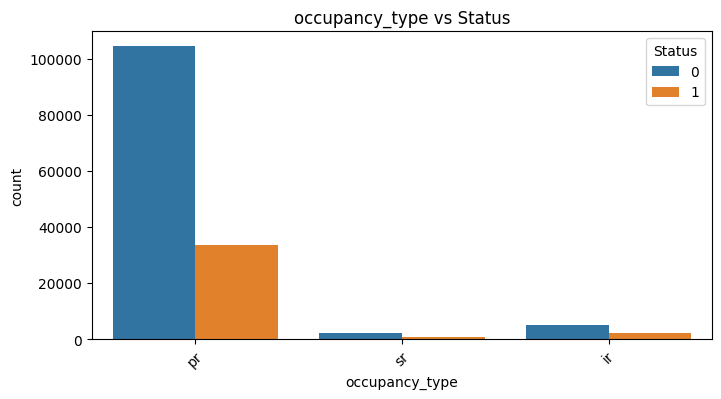

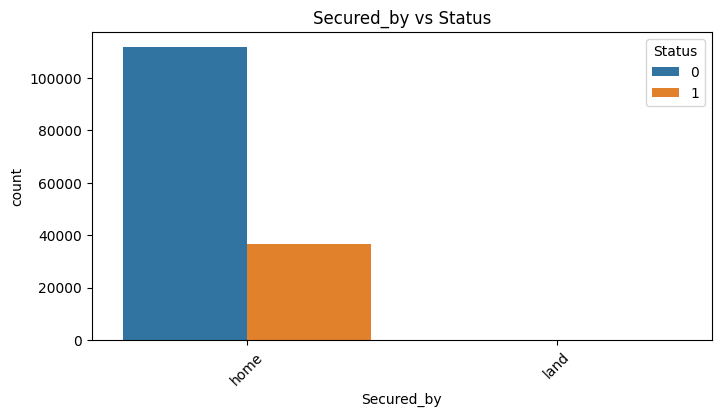

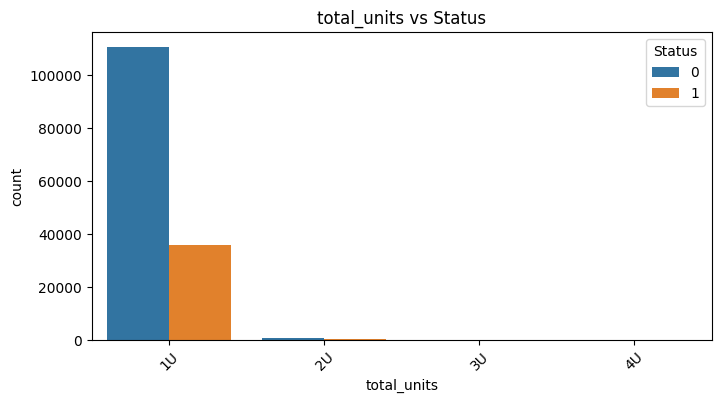

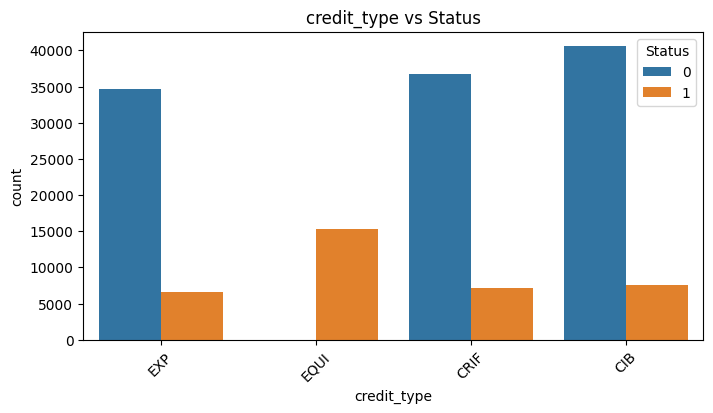

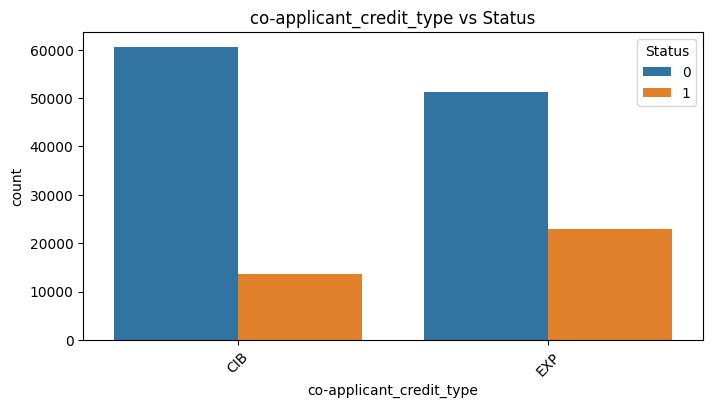

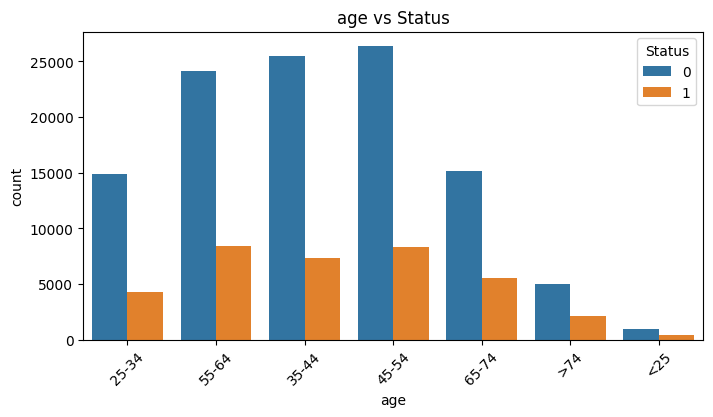

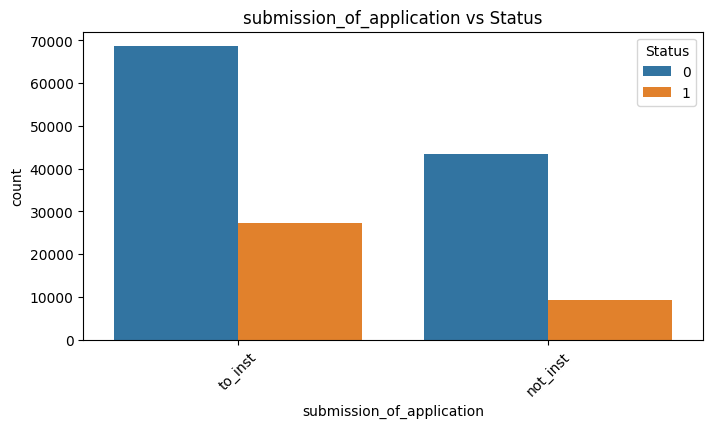

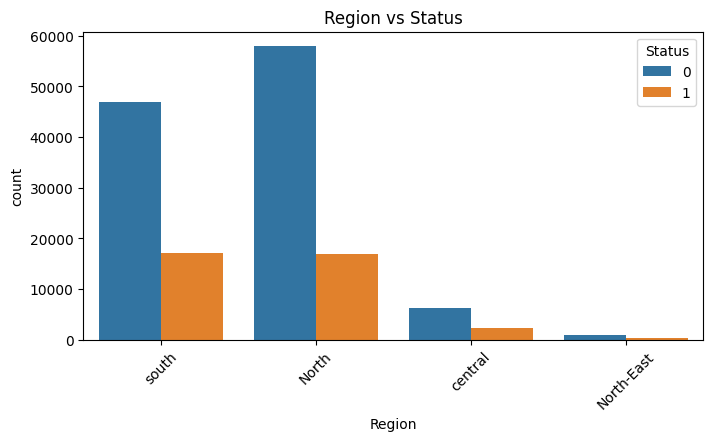

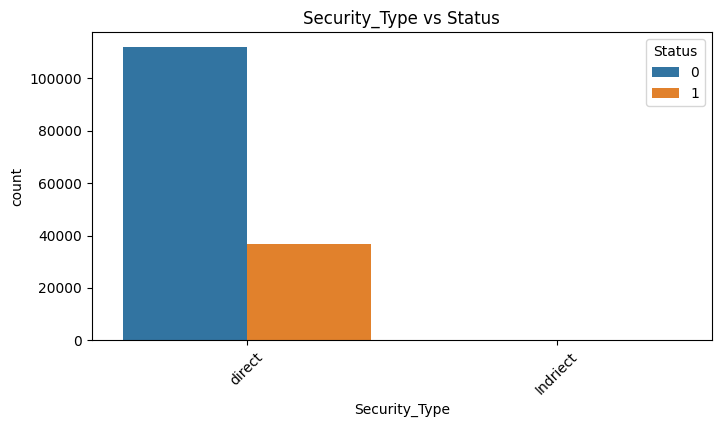

In [21]:
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, hue='Status', data=df)
    plt.title(f"{col} vs Status")
    plt.xticks(rotation=45)
    plt.show()

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


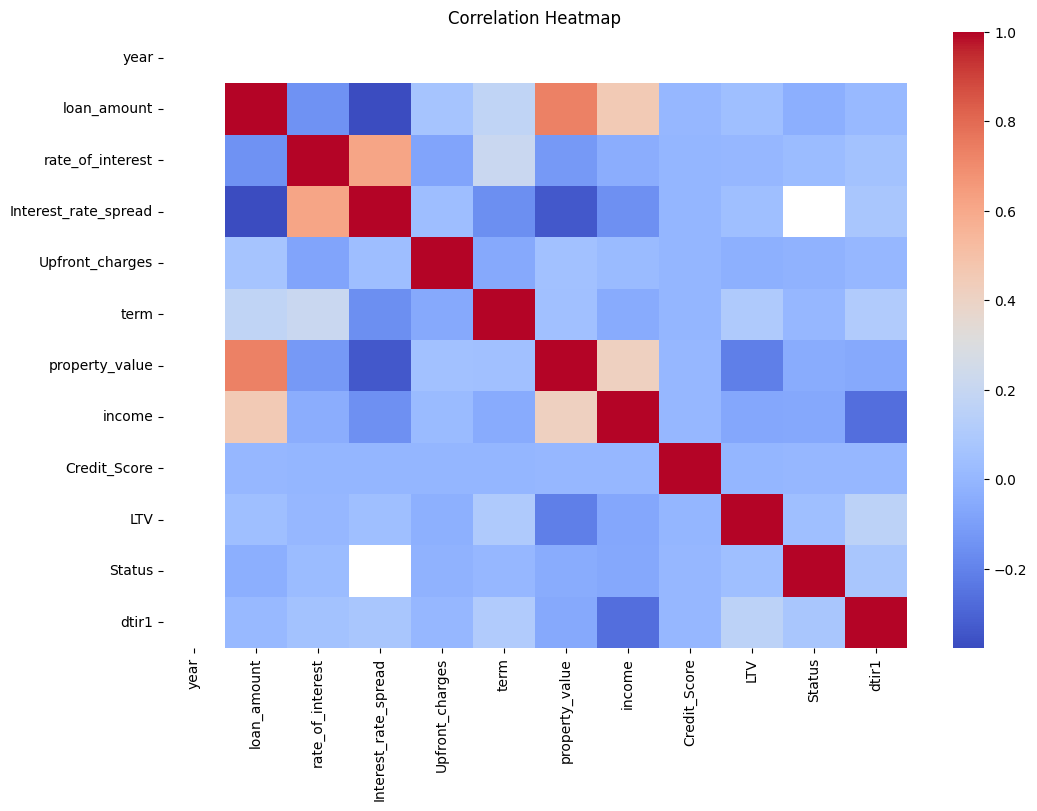

In [22]:
plt.figure(figsize=(12,8))
sns.heatmap(df[num_cols].corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
for col in cat_cols:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col].astype(str))


In [17]:
import scipy.stats as stats

In [18]:
# kruskal wallis test
h_stat, p_val = stats.kruskal(*groups)
print("Kruskal-Wallis H-stat:", h_stat)
print("p-value:", p_val)

Kruskal-Wallis H-stat: nan
p-value: nan


/tmp/ipykernel_36/1911071267.py:2: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  h_stat, p_val = stats.kruskal(*groups)


In [19]:
# t-test only for binary classes
class0 = df[df['Status'] == 0]['income']
class1 = df[df['Status'] == 1]['income']

t_stat, p_val = stats.ttest_ind(class0, class1, equal_var=False)  # Welch’s t-test
print("T-test stat:", t_stat)
print("p-value:", p_val)

T-test stat: nan
p-value: nan
